# 1 Linear Regression with One Variable

We have a file ext1data1.txt that contains our dataset of our linear regression problem. The first column is the population of the city and the second column is the profit of having a store in that city. A negative value for profit indicates a loss. 

Before starting, it is useful to understand the data by visualizing it.  We will use the scatter plot to visualize the data, since it has only two properties to plot (profit and population).

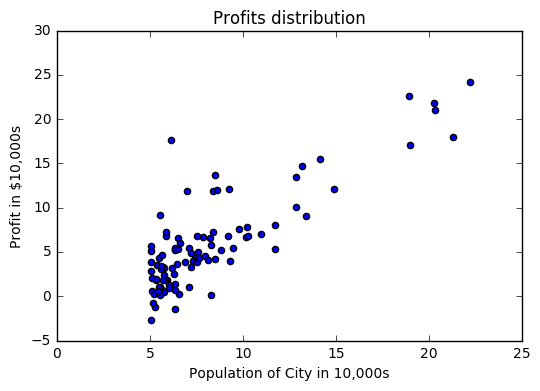

In [3]:
from numpy import loadtxt, ones, zeros,  array, linspace, logspace
#from pylab import scatter, show, xlabel, ylabel, title, plot, contour
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
data = loadtxt('ex1data1.txt', delimiter=',')

# Plot the data
plt.scatter(data[:,0], data[:,1], marker = 'o', c = 'b')
plt.title('Profits distribution')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

m = len(data[:,0])
X = ones(shape=(m, 2)) #Add a column of ones to X (interception data)
X[:, 1] = data[:,0] 
y = data[:, 1]

We want to use linear regression to predict the profit given the population of the city. In this case population of the city is our input variable. We are going to denote it by $x$. Similary, profit is the output variable and will be denoted by $y$. Therefore $(x^i, y^i)$ denotes the ith training example. All the training examples are plotted above. Let $m$ be the number of training examples.

Since we will use linear regression, the form of the function that will be learned is 
\begin{equation}
h(x) = w_0 + w_1 x
\end{equation}

The parameters of the model are the $w$ values. These are the values we want to adjust to minimize the cost. The cost in our case is the least mean square cost given by the following equation.
\begin{equation}
J(w) = \frac{1}{2m}\sum_{i=1}^{m} (h(x^i)-y^i)^2
\end{equation}

The following function implements the cost. Make sure you understand what the function is doing

In [4]:
#Evaluate the linear regression
def compute_cost(X, y, w):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(w).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J

## Task 1
For following different values of $w$ fill the folling table and draw the corresponding hypothesis. For the first $w$ values, I have filled the table and also drawn the plots.

 $w$ | $J(w)$   
 ------   |-------------  
  (10,0) |  23.68             
  (0,1)   |               
  (-5,1)  |               


23.681383362


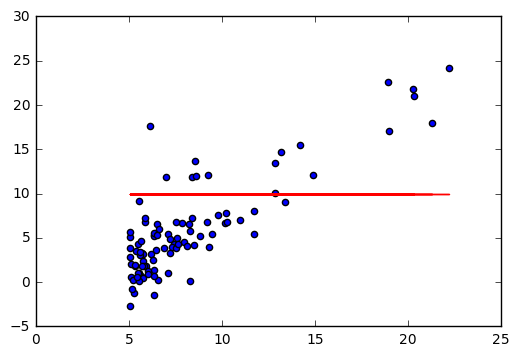

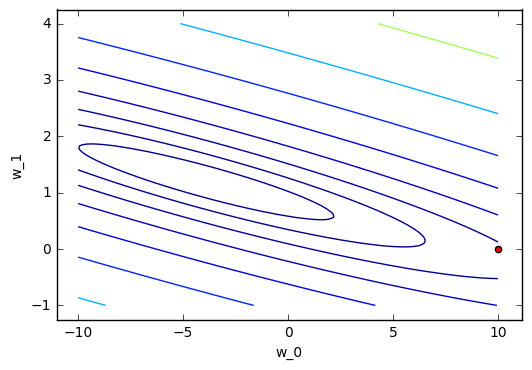

In [5]:
w = array([10,0])
print(compute_cost(X,y,w))

#Plot the results
result = X.dot(w).flatten()
plt.plot(X[:, 1], result, c = 'r')
plt.scatter(X[:,1], y, c = 'b')
plt.show()

plt.figure()
#Grid over which we will calculate J
w0_vals = linspace(-10, 10, 100)
w1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(w0_vals.size, w1_vals.size))

#Fill out J_vals
for t1, element in enumerate(w0_vals):
    for t2, element2 in enumerate(w1_vals):
        wT = zeros(shape=(2, 1))
        wT[0][0] = element
        wT[1][0] = element2
        J_vals[t1, t2] = compute_cost(X, y, wT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(w0_vals, w1_vals, J_vals, logspace(-2, 3, 20))
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.scatter(w[0], w[1], c = 'r')
plt.show()


## Task 2

We will use gradient descent (not stochastic gradient descent) to minimize the cost function. 
Implement the gradient_descent algorithm (#todo parts of the following function)

In [6]:
def gradient_descent(X, y, w, alpha, num_iters):
    '''
    Performs gradient descent to learn w
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(w).flatten()
        
        # TODO: find the gradient grad_w1
        grad_w0 = (predictions - y) * X[:, 0]
        #grad_w1 = ? 
                                
        #TODO: update weights w[1]
        w[0] = w[0] - alpha * (1.0 / m) * grad_w0.sum()
        #w[1] = ?
        
        J_history[i, 0] = compute_cost(X, y, w)
        
    return w, J_history

## Task3

Run the gradient descent algorithm for num_iters = 1500 and the learning rate, alpha=.01.
Initialize the w to (0,0). Plot the final result

In [7]:
alpha = .01
num_iters = 1500
w = array([1.,0.])

w, J_history = gradient_descent(X, y, w, alpha, num_iters)
print(w)

[-3.56417749  1.15972049]


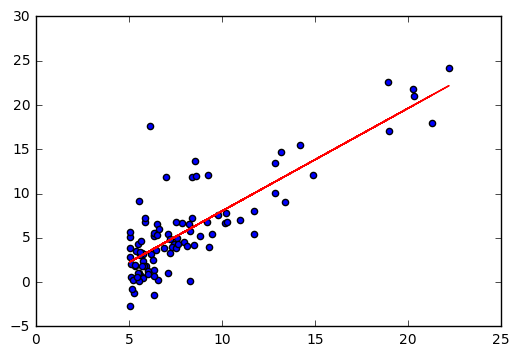

In [13]:
#Plot the results
result = X.dot(w).flatten()
plt.plot(X[:, 1], result, c = 'r')
plt.scatter(X[:,1], y, c = 'b')
plt.show()

***
# 2 Linear Regression with Multiple Variables


Linear regression with multiple variables is also known as "multivariate linear regression".
Notation for equations where we can have any number of input variables:
$x_j^i=$ value of feature j in the ith training example
$x^i=$ the column vector of all the feature inputs of the ith training example
$m=$ the number of training examples
$n=$ the number of features
 
The multivariable form of the hypothesis function accommodating these multiple features is as follows:
$h_w(x)=w_0+w_1 x_1 + w_2 x_2 \cdots w_n x_n$

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:
\begin{align*}
h_w(x) = \begin{bmatrix}w_0 \hspace{2em} w_1 \hspace{2em} ... \hspace{2em} w_n\end{bmatrix}
\begin{vmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{vmatrix} 
= w^T x
\end{align*}            


Load the dataset. Note that the input data is now two dimensional. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column (the output $y$) is the price of the house. 

In [10]:
# Load the datasets
data = loadtxt('ex1data2.txt', delimiter=',')

m = len(data[:,0]) # number of training examples
X = ones(shape=(m, 3)) #Add a column of ones to X
X[:, 1:3] = data[:,0:2] 
y = data[:, 2]

Plot the data

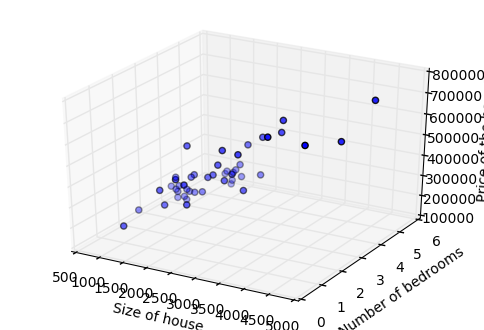

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,1], X[:,2], y,  marker = 'o', c = 'b')
ax.set_xlabel('Size of house')
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price of the house')
plt.show()

## Task 1: Feature Normalization
By looking at the data values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, it is important to perfom a feature scaling that can make gradient descent converge much more quickly. This is because $w$ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:
$−1 \leq x_i \leq 1$

Two techniques to help with this are feature scaling and mean normalization. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. We will use feature normalization. Adjust your input values as shown in this formula:
\begin{equation}
x_i := \dfrac{x_i - \mu_i}{s_i}
\end{equation}

Where $\mu_i$ is the average of all the values for feature (i) and $s_i$ is the range of values (max - min), or $s_i$ is the standard deviation.
Note that dividing by the range, or dividing by the standard deviation, give different results. You can use either of the two.
For example, if $x_i$ represents housing prices with a range of 100 to 2000 and a mean value of 1000, then, $x_i = (price−1000)/1900.$

Implement feature_nomalize below (TODO parts).

In [11]:
def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    
    Do not normalize the first column since it corresponds to x_0, which is all one
    '''
    mean_r = []
    std_r = []

    X_norm = X.copy();

    n_c = X.shape[1]
    for i in range(1, n_c):
        m = np.mean(X[:, i])
        s = np.std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        #TODO: normalize
        #X_norm[:, i] = ?

    return X_norm, mean_r, std_r

## Task 2: Implement Gradient Descent
Implement gradient descent for multivariate regression. It is similar to your earlier implementation in 1d case. Implement the todo part.

In [160]:
def gradient_descent_multi(X, y, w, alpha, num_iters):
    '''
    Performs gradient descent to learn w
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(w).flatten()

        w_size = w.size

        for it in range(w_size):

            temp = X[:, it]

            errors_x1 = (predictions - y) * temp

            # update weights
            #w[it] = ?

        J_history[i, 0] = compute_cost(X, y, w)

    return w, J_history


Now run gradient descent algorithm to find the optimal paramters

In [12]:
alpha = .01
num_iters = 500
w = array([0.,0.,0.])

X_norm, mean_r,std_r  = feature_normalize(X)
w, J_history = gradient_descent_multi(X_norm, y, w, alpha, num_iters)
print(w)

NameError: name 'gradient_descent_multi' is not defined

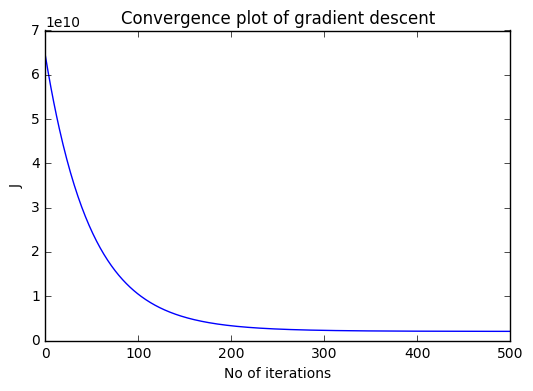

In [179]:
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

Predicted price of a 1650 sq-ft, 4 br house is:

In [13]:
price = array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((4 - mean_r[1]) / std_r[1])]).dot(w)
print(price)

0.0


## Task 3: Normal Equation
Gradient descent gives one way of minimizing J. Let’s discuss a second way of doing so, this time performing the minimization explicitly and without resorting to an iterative algorithm. In the "Normal Equation" method, we will minimize J by explicitly taking its derivatives with respect to the θj ’s, and setting them to zero. This allows us to find the optimum w without iteration. The normal equation formula is given below: (For large datasets normal method is computationally expensive and therefore gradient descent approach is used)

$w = (X^T X)^{-1}X^T y$

Implement normal equation below

In [183]:
invX = np.linalg.pinv(X_norm.T.dot(X_norm));
w = invX.dot(X_norm.T).dot(y)
print(w)

[ 340412.65957447  109447.79646964   -6578.35485416]


In [184]:
price = array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((4 - mean_r[1]) / std_r[1])]).dot(w)
print(price)

284343.445223
